# Modrek: Predictive Modeling of Crime Incidents Using Geospatial Data

**Modrek** is a predictive modeling system that utilizes geospatial data analysis, machine learning, and deep learning techniques to forecast crime incidents. This project endeavors to furnish actionable insights into crime patterns, empowering law enforcement agencies to strategically allocate resources and adopt proactive measures in crime prevention efforts.

* Background:

Crime prediction and analysis have become crucial in modern law enforcement, allowing agencies to anticipate potential crime hotspots and allocate resources more effectively. Traditional crime analysis methods often struggle with the complexity and volume of data generated in urban environments. To address these challenges, this project leverages Apache Spark, a powerful distributed computing framework, to handle large datasets and perform scalable machine learning tasks efficiently.

* Datasets:

Disaster Tweets DataSet : https://www.kaggle.com/competitions/nlp-getting-started/data

Crimes In Chicago (2001 to 2024) Dataset:https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2


* Exploratory Data Analysis:

  1. Temporal Analysis

  2. Seasonal Analysis

  3. Geographical Analysis

  4. Demographic Context Analysis

  5. Social Media Data

* Predictive Analysis:
   1. Temporal Features Analysis

  2. Seasonal Features Analysis

  3. Geographical Features Analysis

  4. Demographic Context Analysis

  5. Social Media Data

* Technologies and Tools:

  * Apache Spark: For distributed data processing and scalable machine learning.
  * PySpark: Python API for Spark to handle data transformations and machine learning tasks.
  * Scikit-learn: For implementing the meta-model in the ensemble approach.
  * Pandas and NumPy: For data manipulation and numerical operations.
  * Matplotlib: For visualizing KDE results and clustering outputs.

* Expected Outcomes:

This project aims to:

* Improve the accuracy and reliability of crime type predictions.
* Provide actionable insights for law enforcement agencies to prevent and respond to crimes effectively.
* Enhance understanding of the temporal, geographical, and demographic factors influencing crime.

# Project SetUp

### Libraries and Tools

In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.functions import format_number, when, col, array, udf, lit
import pandas as pd
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer, IndexToString
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.types import *
import pyspark.sql.functions as F
import matplotlib.pyplot as plt


In [ ]:
spark = SparkSession.builder.appName("Project - Chicago crime")\
.config("spark.some.config.option", "some-value")\
.config("spark.driver.memory", "8g")\
.config("spark.driver.cores", "3")\
.getOrCreate()

In [ ]:
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("Case Number", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("Primary Type", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("Location Description", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("Community Area", StringType(), True),
                            StructField("FBI Code", StringType(), True ),
                            StructField("X Coordinate", DoubleType(), True),
                            StructField("Y Coordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("Updated On", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

## Dataset

### Disaster Tweets DataSet

https://www.kaggle.com/competitions/nlp-getting-started/data

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Explore Training Dataset
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Crimes In Chicago (2001 to 2024) Dataset

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

In [ ]:
dataset =spark.read.option("header", "True")\
        .option("inferSchema", "true").csv("/content/Crimes_-_2001_to_Present.csv")

In [ ]:
dataset.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
#Explore the data
dataset.limit(5).toPandas().head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


## Process the data

### Disaster Tweets DataSet

**Preprocessing the Tweets:**
Preprocessing the tweet text using NLTK and Gensim libraries.

In [ ]:
# Preprocess the tweets
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
import regex as re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# Function to preprocess data with Gensim
def preprocess_gensim(text):
    # Remove non-alphanumeric characters from data
    text = [re.sub(r'[^a-zA-Z0-9]', ' ', text) for text in text]

    # Lemmatize, stem and tokenize words in the dataset, removing stopwords
    text = [(PorterStemmer().stem(WordNetLemmatizer(). lemmatize(w, pos='v')) )for w in text]
    result = [[token for token in gensim.utils.simple_preprocess(sentence) if not token in
              gensim.parsing.preprocessing.STOPWORDS and len(token) > 3] for sentence in text]
    return result

print('NTLK stopwords: {} \n \n \n Gensim stopwords: {}'.format(stop_words, gensim.parsing.preprocessing.STOPWORDS))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NTLK stopwords: {'she', 'himself', "doesn't", 'from', 'aren', 'me', 'after', 'm', 'my', "isn't", 'he', 'the', 'because', 'doing', 'these', 'just', 'does', 'how', 'in', 'few', 'as', "didn't", "won't", 's', 'myself', "shouldn't", 'itself', 'ours', 'have', 'a', 'its', 'those', 'her', 'hers', 'herself', 'don', 'before', 'will', "you'll", 'between', 'below', 'having', "don't", 'his', "that'll", "aren't", 'being', 'if', 'should', "couldn't", 'which', "mightn't", 'each', 'am', 'with', 'yourselves', 'be', 'so', 're', 'nor', 'on', 'off', 'ourselves', "mustn't", 'was', 've', 'you', 'same', 'didn', 'hasn', 'against', 'them', 'down', 'while', 'when', 'were', 'why', 'and', 'there', 'an', 'through', 'that', 'out', 'won', 'some', 'can', 'whom', 'up', 'it', 'than', 'haven', 'by', 'yours', 'doesn', "it's", 'had', 'our', 'this', 'are', "weren't", 'your', "should've", "haven't", 'about', 'at', 'but', 'y', 'shouldn', 'they', 'not', 'who', 'isn', 'mightn', 'what', "you're", 'has', 'into', 'then', 'other', 

**Splitting Data and Extracting Features:**
Splitting the data into training and testing sets and extracting Bag-of-Words (BoW) features.

In [ ]:
from sklearn.model_selection import train_test_split

#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(train_df['text'].to_list(), train_df['target'].to_list(),
                                                    random_state=0)
# Carry out preprocessing on text data
words_train, words_test = preprocess_gensim(X_train), preprocess_gensim(X_test)
from sklearn.feature_extraction.text import CountVectorizer

# Extract Bag-of-Words (BoW)
vectorizer = CountVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)
features_train = vectorizer.fit_transform(words_train).toarray()

features_test = vectorizer.transform(words_test).toarray()

# Create a vocabulary from the dataset
vocabulary = vectorizer.vocabulary_

import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
features_train = pr.normalize(features_train, axis=0)
features_test = pr.normalize(features_test, axis=0)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Crimes In Chicago (2001 to 2024) Dataset

In [ ]:
#Select data that after 2020
dataset=dataset.filter((dataset['Year'] >2020) & (dataset['Year'] !=2024))


In [ ]:
#Merge similar crime types
dataset = dataset.withColumn("Primary Type", \
                               when((dataset["Primary Type"] == 'CRIM SEXUAL ASSAULT') | \
                                    (dataset["Primary Type"] == 'PROSTITUTION') ,'SEX OFFENSE').otherwise(dataset['Primary Type']))
dataset=dataset.withColumn("Primary Type", \
                               when((dataset["Primary Type"] == 'WEAPONS VIOLATION') | \
                                    (dataset["Primary Type"] == 'INTERFERENCE WITH PUBLIC OFFICER') ,'PUBLIC PEACE VIOLATION').otherwise(dataset['Primary Type']))
dataset=dataset.withColumn("Primary Type", \
                               when((dataset["Primary Type"] == 'ARSON') ,'CRIMINAL TRESPASS').otherwise(dataset['Primary Type']))

In [ ]:
#Extract Day, Month, WeekDay, Hour from Date column
dataset=dataset.withColumn("Day", F.split(dataset.Date, " ")[0])
dataset=dataset.withColumn("Day", F.to_date(dataset.Day, "MM/dd/yyyy"))
dataset=dataset.withColumn("Month", F.month(dataset.Day))
dataset=dataset.withColumn("WeekDay", F.dayofweek(dataset.Day))
dataset=dataset.withColumn("Hour", F.split(F.split(dataset.Date," ")[1], ":")[0].cast("int"))
dataset=dataset.na.drop()
dataset.limit(5).toPandas().head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,WeekDay,Hour
0,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,True,...,1876425,2021,09/12/2022 04:45:45 PM,41.816657,-87.695689,"(41.81665685, -87.695688608)",2021-12-19,12,1,7
1,12602803,JF125633,10/21/2021 11:00:00 AM,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,...,1849805,2021,02/27/2022 03:46:31 PM,41.742941,-87.585783,"(41.74294124, -87.585783412)",2021-10-21,10,5,11
2,12540388,JE444591,11/14/2021 06:00:00 AM,086XX S COTTAGE GROVE AVE,0850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,...,1847869,2021,11/21/2021 03:48:03 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",2021-11-14,11,1,6
3,12541139,JE445494,11/14/2021 04:00:00 AM,034XX W 38TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1879187,2021,11/21/2021 03:48:03 PM,41.824317,-87.710266,"(41.824316537, -87.710266215)",2021-11-14,11,1,4
4,12445976,JE328996,08/07/2021 02:36:00 AM,131XX S FORRESTVILLE AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,1819061,2021,01/03/2023 03:46:28 PM,41.658679,-87.602776,"(41.658678993, -87.602776239)",2021-08-07,8,7,2


In [ ]:
#Drop all the invalid data
#dataset=dataset.na.drop()

# Data Analysis


### 1. Crime Types Analysis

In [ ]:
#Count the number of crimes
dataset.groupby('Primary Type').count().orderBy('count', ascending=False).show()

+--------------------+-----+
|        Primary Type|count|
+--------------------+-----+
|               THEFT|  258|
|             BATTERY|  228|
|     CRIMINAL DAMAGE|  145|
|             ASSAULT|  112|
| MOTOR VEHICLE THEFT|   83|
|       OTHER OFFENSE|   77|
|  DECEPTIVE PRACTICE|   70|
|PUBLIC PEACE VIOL...|   61|
|             ROBBERY|   40|
|            BURGLARY|   35|
|   CRIMINAL TRESPASS|   26|
|           NARCOTICS|   22|
|OFFENSE INVOLVING...|   11|
|CRIMINAL SEXUAL A...|    8|
|         SEX OFFENSE|    5|
|            STALKING|    4|
|            HOMICIDE|    1|
|           OBSCENITY|    1|
|        INTIMIDATION|    1|
+--------------------+-----+



Text(0, 0.5, 'Crime Type')

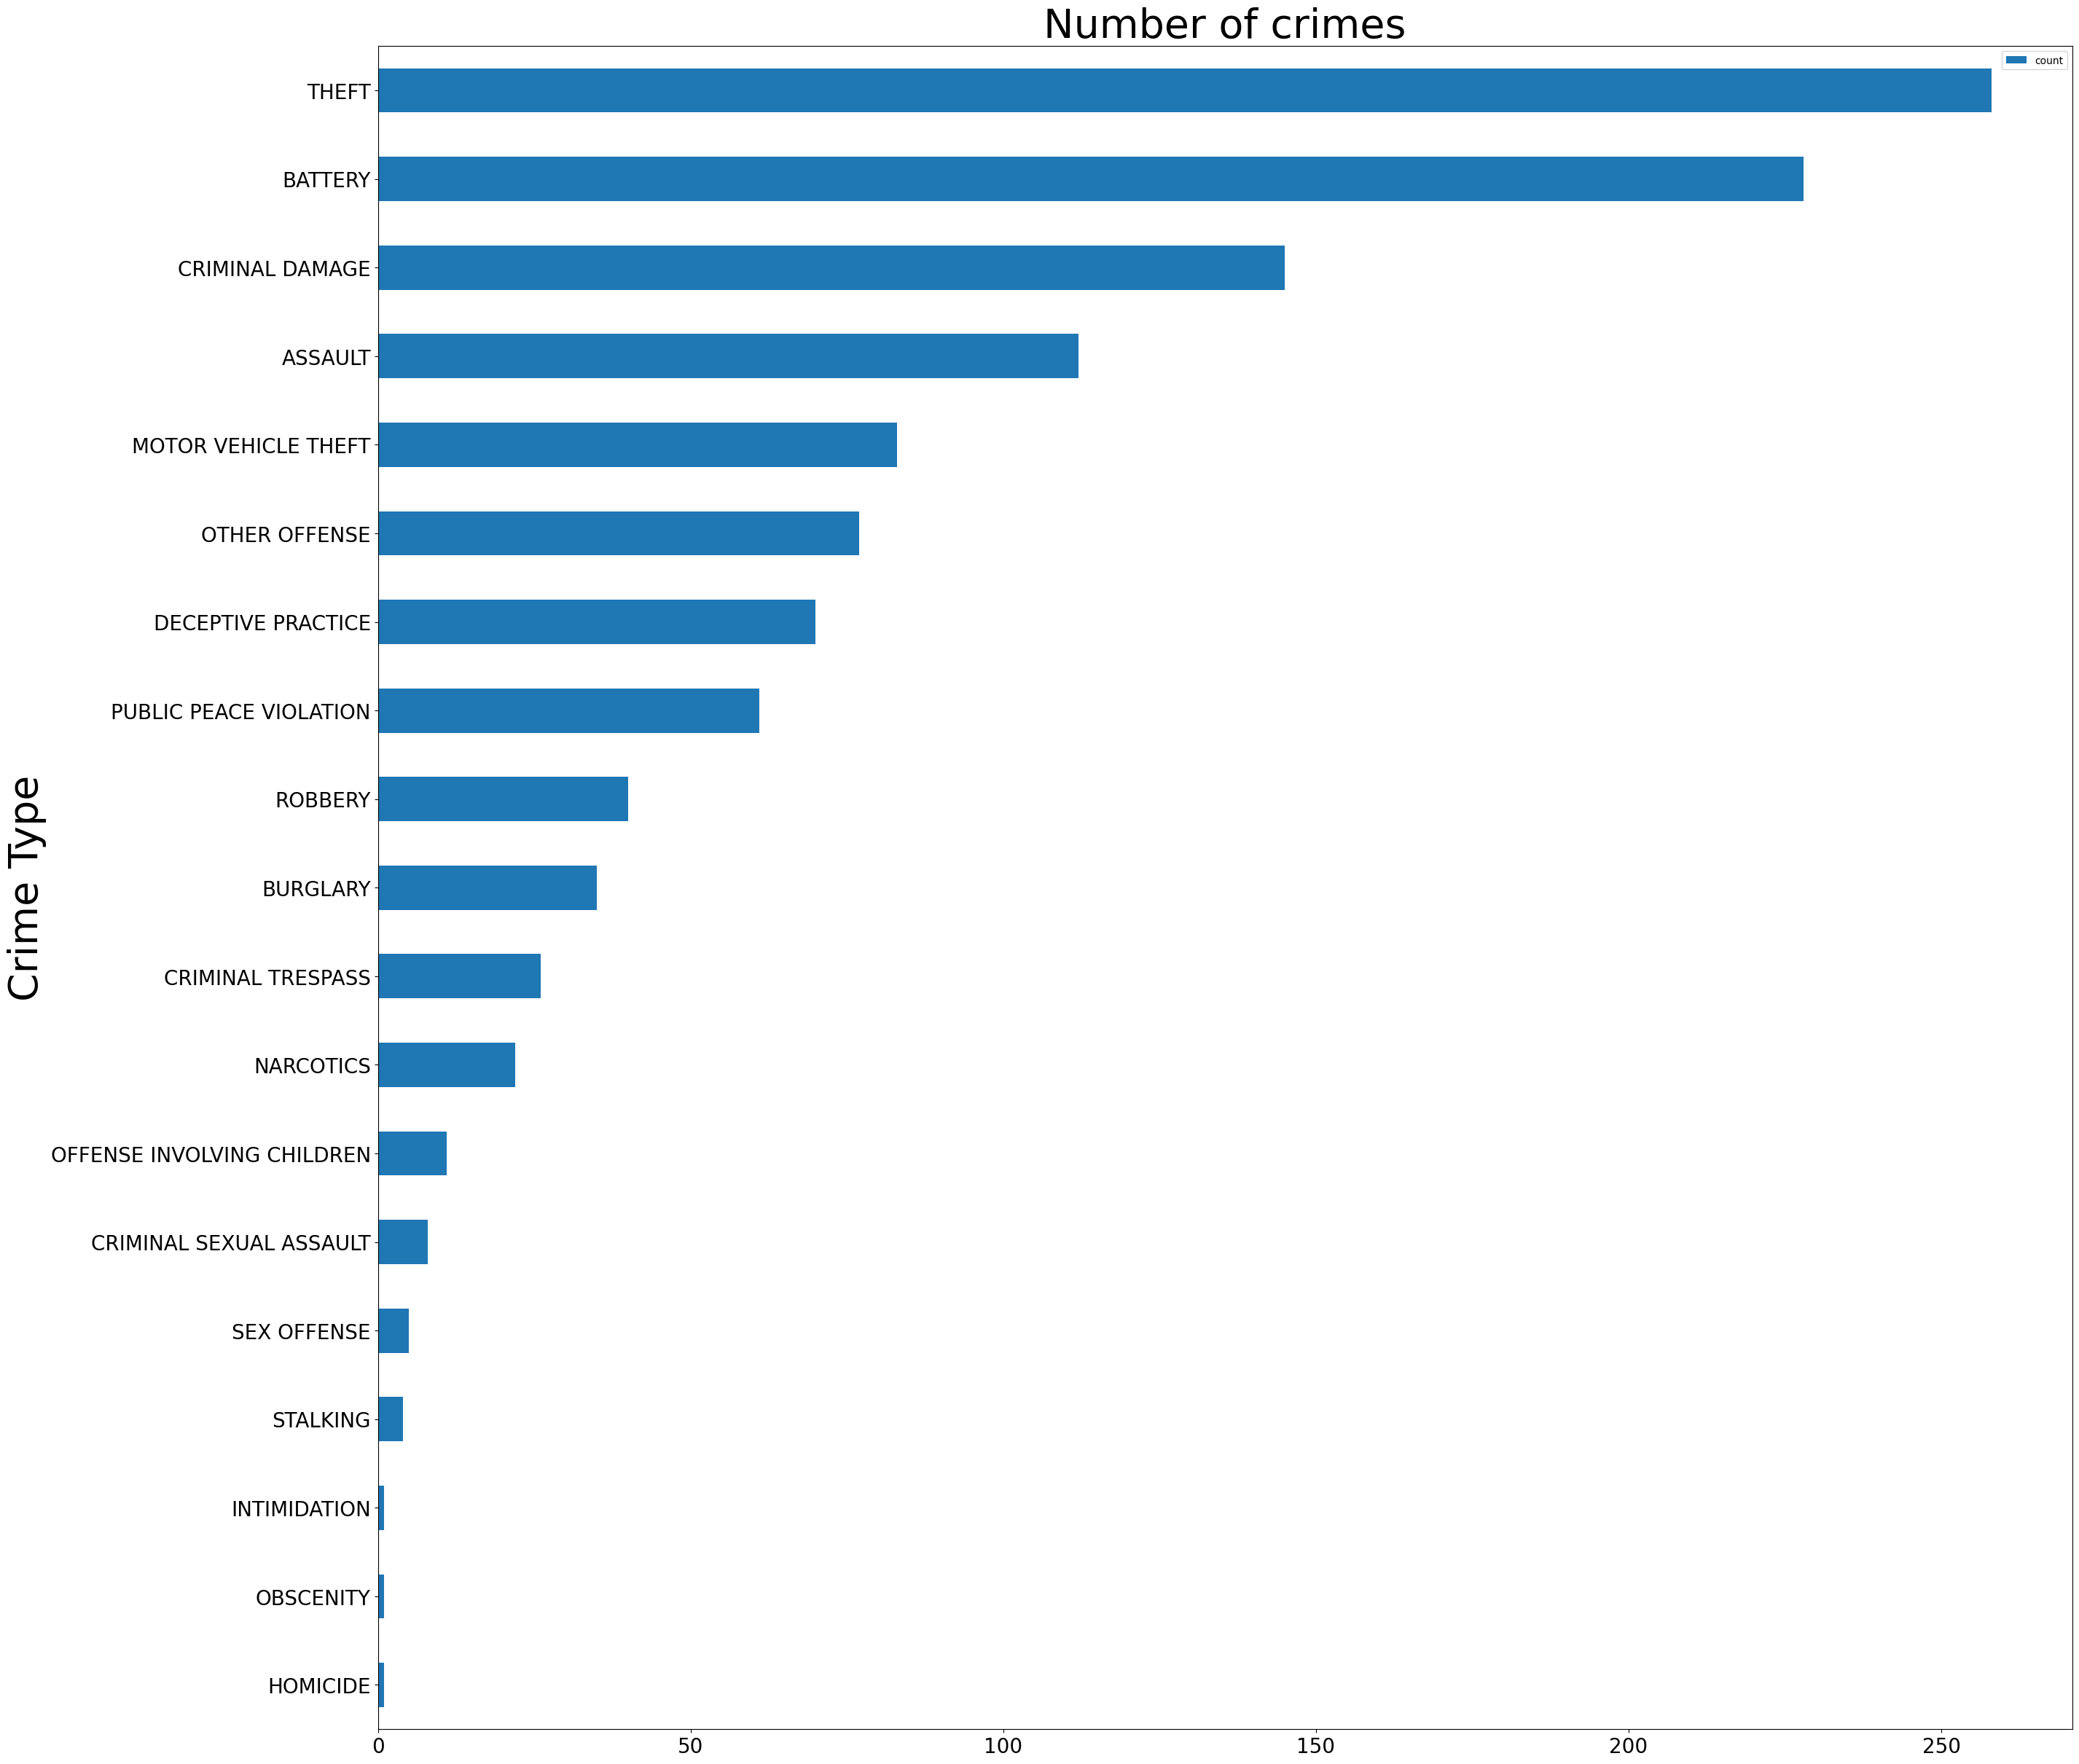

In [ ]:
#Visulize the crime types
dataset.groupBy("Primary Type")\
        .count().toPandas().sort_values(by='count')\
        .plot(x='Primary Type',y='count',\
                      kind='barh', \
                      figsize=(30, 30),fontsize=20)
plt.title("Number of crimes", fontsize=40)
plt.ylabel('Crime Type', fontsize=40)

### 2.Temporal Analysis

**Yearly Distribution**

In [ ]:
#Count the number of crimes per year
dataset.groupby('Year').count().show()

+----+-----+
|Year|count|
+----+-----+
|2023|  387|
|2022|    1|
|2021|  800|
+----+-----+



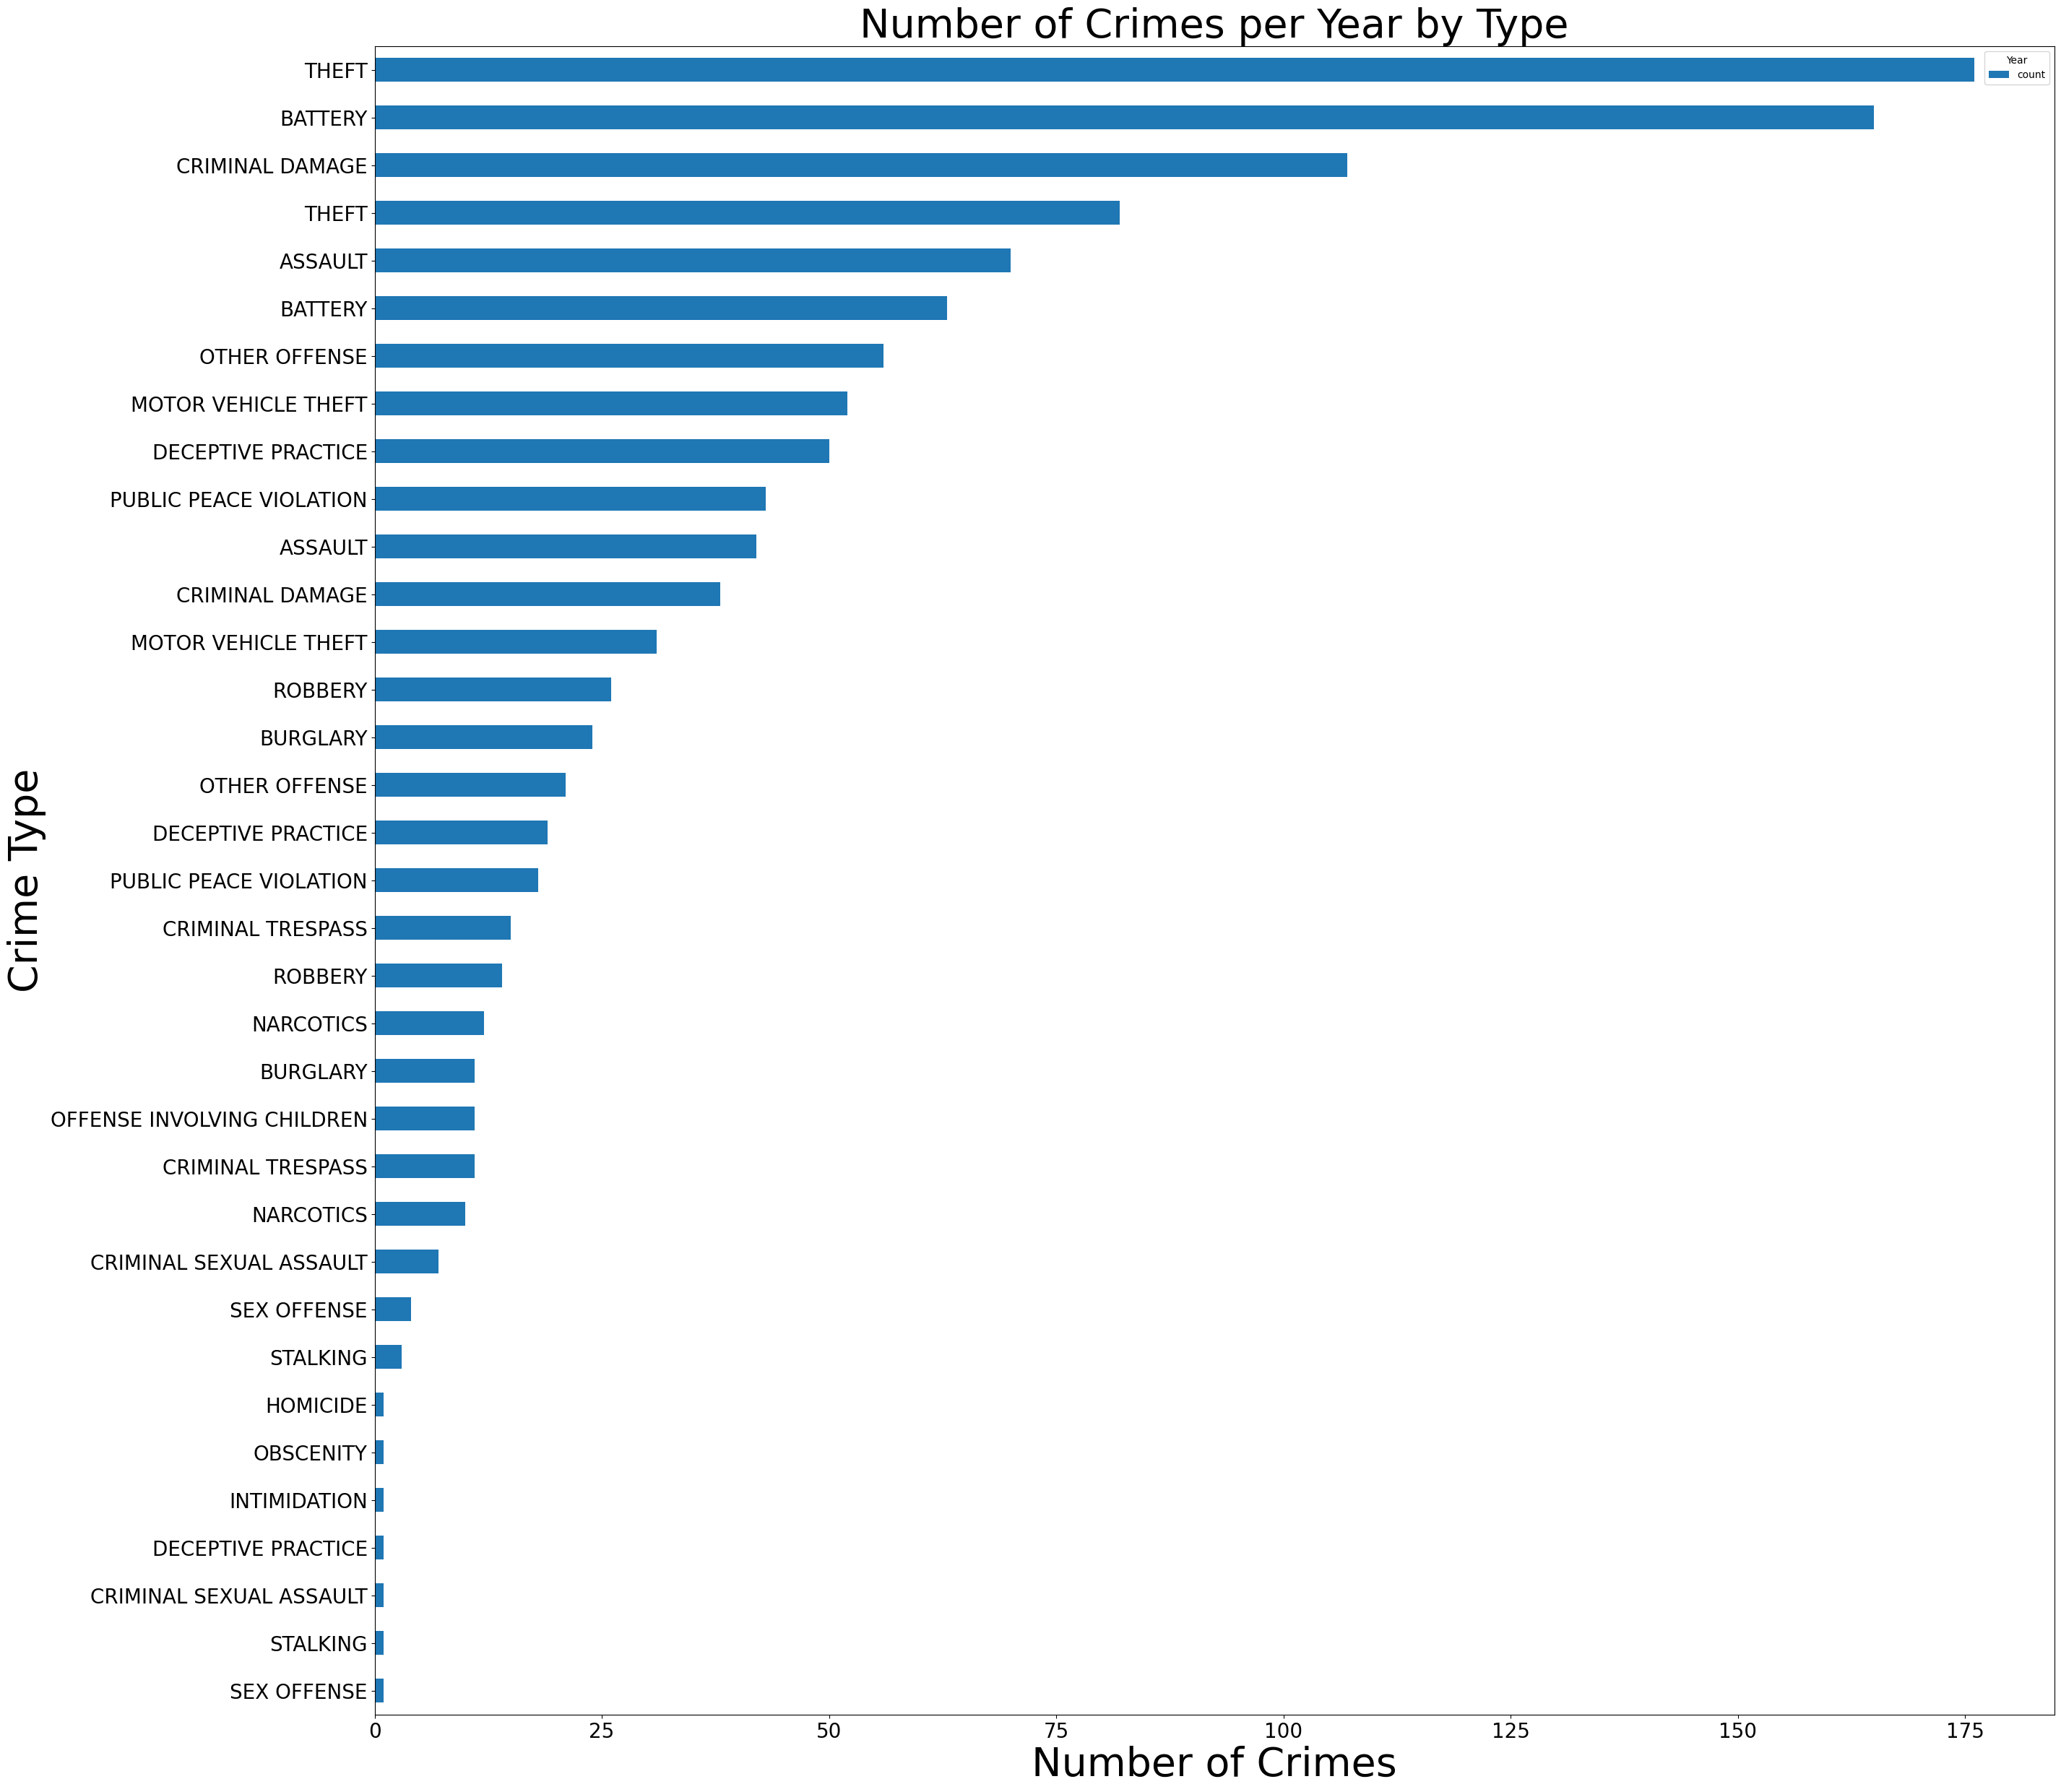

In [ ]:
#Visulize the crime types per year
crime_data = dataset.groupBy("Year", "Primary Type").count()
dataset.groupBy("Year", "Primary Type")\
        .count().toPandas().sort_values(by='count')\
        .plot(x='Primary Type',y='count',\
                      kind='barh', \
                      figsize=(30, 30),fontsize=20)
plt.title("Number of Crimes per Year by Type", fontsize=40)
plt.xlabel('Number of Crimes', fontsize=40)
plt.ylabel('Crime Type', fontsize=40)
plt.legend(title='Year')

**Weekly Distribution**

In [ ]:
#DAY
dataset.groupby('WeekDay').count().show()

+-------+-----+
|WeekDay|count|
+-------+-----+
|      1|  104|
|      6|  447|
|      3|   18|
|      5|  562|
|      4|   26|
|      7|   18|
|      2|   13|
+-------+-----+



Weekday Codes:

1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday
7: Sunday

High Crime Days:
(Weekends)
* Saturday (6): 154 crimes
* Friday (5): 136 crimes

**Hourly Distribution**

In [ ]:
#Hour
dataset.groupby('Hour').count().show()

+----+-----+
|Hour|count|
+----+-----+
|  12|  147|
|   1|   83|
|   6|   85|
|   3|   93|
|   5|   83|
|   9|  111|
|   4|   86|
|   8|  124|
|   7|   98|
|  10|   86|
|  11|   96|
|   2|   96|
+----+-----+



### 3.Seasonal Analysis (Weather)

In [ ]:
dataset.groupby('Month').count().show()

+-----+-----+
|Month|count|
+-----+-----+
|   12|    2|
|    1|    7|
|    3|  403|
|    5|    2|
|    9|    2|
|    4|  483|
|    8|  180|
|    7|   19|
|   10|    1|
|   11|   85|
|    2|    4|
+-----+-----+



In [ ]:
Month_Crime_Count_data= {
    'Month': [12, 1, 5, 9, 4, 8, 7, 10, 11, 3, 2],
    'Count': [2, 2, 2, 2, 160, 34, 6, 1, 27, 108, 2]
}
df = pd.DataFrame(Month_Crime_Count_data)

# Define the seasons
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season
    return None
df['Season'] = df['Month'].apply(get_season)
season_counts = df.groupby('Season')['Count'].sum()
print(season_counts)


Season
Fall       30
Spring    270
Summer     40
Winter      6
Name: Count, dtype: int64


The large number of crimes in spring could be interpreted by several factors:

* Weather and Activity Levels:

  * Warmer Weather
  * Longer Days (Increased daylight)

* School and College Terms:
  * End-of-term parties and gatherings
  * Celebrations like Spring Break and St. Patrick's Day increase risky behaviors.

* Psychological and Behavioral Factors:

  * Seasonal Affective Disorder (SAD): Recovery from winter-related SAD may result in impulsive behavior.
  * Pent-up Energy: After winter, people release pent-up energy, sometimes through anti-social behavior.

* Economic and Structural Factors:

  * Economic Activity: Spring economic uptick can correlate with more property crimes.
  * Law Enforcement Patterns: Changes in policing practices may lead to more reported crimes.
* Environmental Changes:

  * Urban Environment: Opening of parks and public spaces leads to more congregations and potential crimes.





### 4.Geographical Analysis

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

latitude = 41.864073157
longitude = -87.706818608


heatMap = folium.Map(location=[latitude, longitude],
                 tiles = "OpenStreetMap",
                zoom_start=12)
hotspot = dataset.toPandas().head(20000)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in hotspot.iterrows()]
HeatMap(heat_data, radius=10).add_to(heatMap)

heatMap

### 5.Demographic Context Analysis

In [ ]:
dataset.groupby('Block').count().orderBy('count', ascending=False).show()

+--------------------+-----+
|               Block|count|
+--------------------+-----+
| 042XX N SHERIDAN RD|    3|
|   017XX W HOWARD ST|    3|
|  009XX W ADDISON ST|    3|
| 0000X E RANDOLPH ST|    3|
| 0000X W TERMINAL ST|    3|
|    001XX N STATE ST|    3|
|    0000X N STATE ST|    3|
|    003XX W 117TH ST|    3|
|079XX S CARPENTER ST|    3|
| 016XX N LA SALLE DR|    3|
|015XX S FAIRFIELD...|    3|
|024XX N FRANCISCO...|    2|
|046XX S HERMITAGE...|    2|
|  012XX N HALSTED ST|    2|
|     003XX E 51ST ST|    2|
| 051XX S INDIANA AVE|    2|
|     007XX W LAKE ST|    2|
|    002XX E HURON ST|    2|
|047XX S WESTERN BLVD|    2|
|  015XX W PRATT BLVD|    2|
+--------------------+-----+
only showing top 20 rows



Concentration of multiple crimes in specific blocks can point to potential problem areas that require focused attention. Different demographic factors (High Traffic Areas,Residential vs. Commercial Areas,Ethnic and Racial Diversity,Economic Diversity,Education,Community Engagement) can help in identifying and understanding the distribution of crime by block.

> * 042XX N SHERIDAN RD





Neighborhood: Uptown
Demographics: Very diverse, with a mix of ethnicities including significant Asian and Hispanic populations. Mix of income levels with affordable housing and gentrifying areas.

> * 084XX S GREEN ST

Neighborhood: Auburn Gresham
Demographics: Predominantly African American, middle to lower-middle class, facing economic challenges but strong community ties.



### 6.Social Media Data Analysis (X posts)

In [ ]:
# Explore the rows where the keyword is related to crimes.
crime_related_keywords = ['arson', 'attack', 'attacked', 'bioterror', 'bioterrorism', 'bomb', 'bombed',
                         'bombing', 'casualties', 'casualty', 'chemical%20emergency', 'collapse', 'collapsed',
                         'crash', 'crashed', 'dead', 'death', 'deaths', 'destroy', 'destroyed', 'destruction',
                         'disaster', 'fatal', 'fatalities', 'fatality', 'fire', 'hijack', 'hijacker', 'hijacking',
                         'hostage', 'hostages', 'injured', 'injuries', 'injury', 'mass%20murder', 'mass%20murderer',
                         'massacre', 'mayhem', 'meltdown', 'nuclear%20disaster', 'obliterate', 'obliterated',
                         'obliteration', 'outbreak', 'police', 'rescue', 'rescued', 'rescuers', 'riot', 'rioting',
                         'terrorism', 'terrorist', 'threat', 'tragedy', 'trapped', 'trauma', 'traumatised', 'wounded',
                         'wounds']

crime_related = train_df[train_df['keyword'].isin(crime_related_keywords)]
crime_related[['keyword']]

,keyword
380,arson
381,arson
382,arson
383,arson
384,arson
...,...
7463,wounds
7464,wounds
7465,wounds
7466,wounds


Visualizing Dominant Crime Type in Top 10 Locations

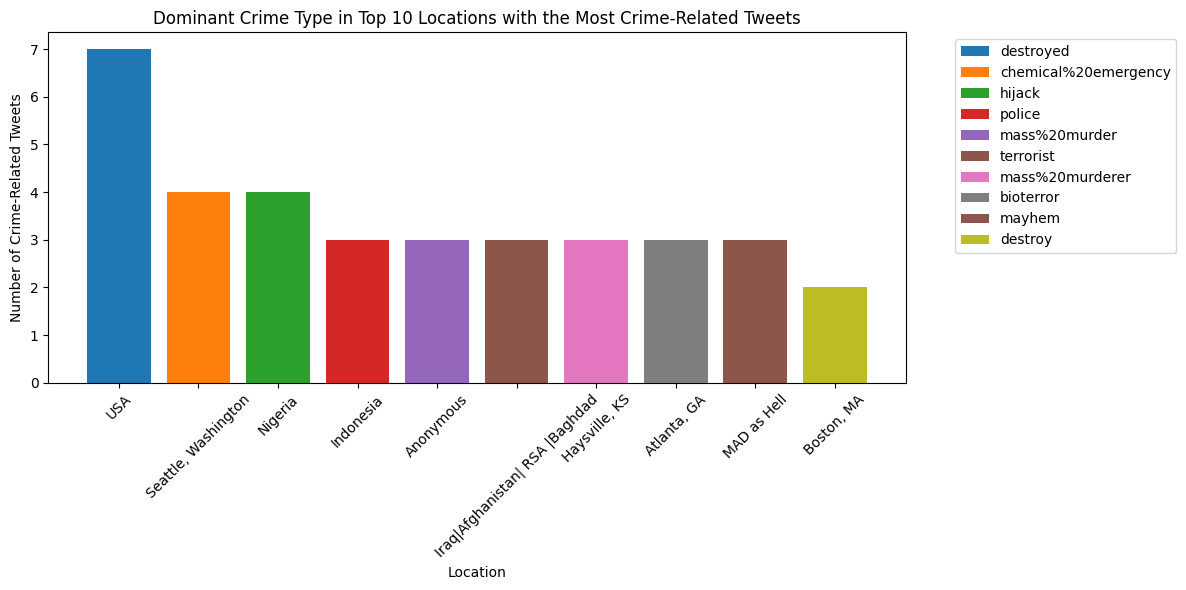

In [ ]:
from collections import Counter

# Get location-wise crime related tweets
location_crime_count = crime_related.groupby(['location', 'keyword']).size().reset_index(name='count')

# Get the index of the maximum count for each location
idx = location_crime_count.groupby(['location'])['count'].transform(max) == location_crime_count['count']

# Get the dominant crime type for each location
dominant_crime = location_crime_count[idx]
# Sort by count
dominant_crime = dominant_crime.sort_values(by='count', ascending=False)


# Get unique crime types
unique_crime_types = dominant_crime['keyword'].unique()

# Define colors for each crime type
colors = plt.cm.tab10.colors[:len(unique_crime_types)]

# Plotting the top 10 locations with the most dominant crime types
plt.figure(figsize=(12, 6))
for i, location in enumerate(dominant_crime['location'].unique()[:10]):
    crime_types = dominant_crime[dominant_crime['location'] == location]
    plt.bar(location, crime_types['count'], color=[colors[unique_crime_types.tolist().index(x)] for x in crime_types['keyword']])

plt.xlabel('Location')
plt.ylabel('Number of Crime-Related Tweets')
plt.title('Dominant Crime Type in Top 10 Locations with the Most Crime-Related Tweets')
plt.xticks(rotation=45)
plt.legend(unique_crime_types, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# filters the data to include only the rows where the 'location' column has the value 'Chicago'.
chicago_related = train_df[train_df['location'] == 'Chicago']
chicago_related[['location']]

,location
404,Chicago
892,Chicago
1281,Chicago
2123,Chicago
2318,Chicago
2340,Chicago
2472,Chicago
3878,Chicago
4192,Chicago
7360,Chicago


In [ ]:
# Explore the rows where the keyword is related to crimes.
crime_related_keywords = ['arson', 'attack', 'attacked', 'bioterror', 'bioterrorism', 'bomb', 'bombed',
                         'bombing', 'casualties', 'casualty', 'chemical%20emergency', 'collapse', 'collapsed',
                         'crash', 'crashed', 'dead', 'death', 'deaths', 'destroy', 'destroyed', 'destruction',
                         'disaster', 'fatal', 'fatalities', 'fatality', 'fire', 'hijack', 'hijacker', 'hijacking',
                         'hostage', 'hostages', 'injured', 'injuries', 'injury', 'mass%20murder', 'mass%20murderer',
                         'massacre', 'mayhem', 'meltdown', 'nuclear%20disaster', 'obliterate', 'obliterated',
                         'obliteration', 'outbreak', 'police', 'rescue', 'rescued', 'rescuers', 'riot', 'rioting',
                         'terrorism', 'terrorist', 'threat', 'tragedy', 'trapped', 'trauma', 'traumatised', 'wounded',
                         'wounds']

crime_related = chicago_related[chicago_related['keyword'].isin(crime_related_keywords)]
crime_related[['keyword']]

,keyword
404,arson
2123,death


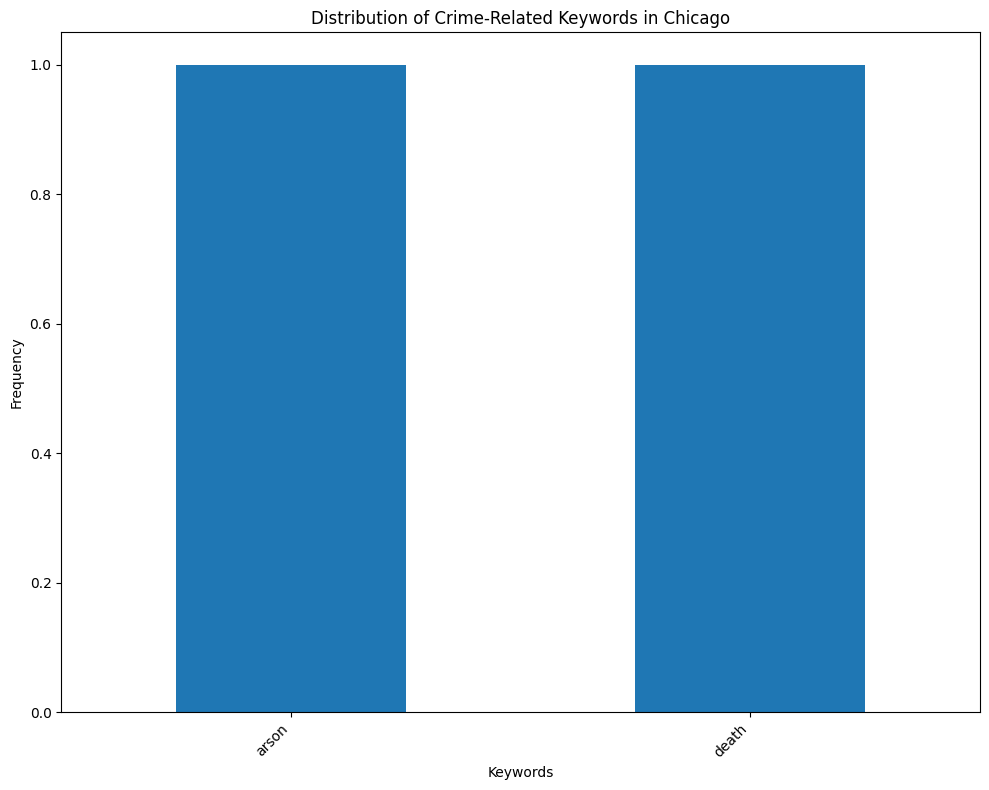

In [ ]:
# Bar Plot for Keyword Distribution
keyword_counts = crime_related['keyword'].value_counts()
plt.figure(figsize=(10, 8))
keyword_counts.plot(kind='bar')
plt.title('Distribution of Crime-Related Keywords in Chicago')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

import folium
from folium.plugins import HeatMap
# Heatmap for Geographic Distribution (if coordinates are available)
# Assuming the coordinates are in a column named 'Coordinates' in (latitude, longitude) tuple format
if 'Coordinates' in crime_related.columns:
    crime_related = crime_related.dropna(subset=['Coordinates'])
    crime_related['Latitude'] = crime_related['Coordinates'].apply(lambda x: x['coordinates'][1] if x else None)
    crime_related['Longitude'] = crime_related['Coordinates'].apply(lambda x: x['coordinates'][0] if x else None)

    # Filter out invalid coordinates
    crime_related = crime_related.dropna(subset=['Latitude', 'Longitude'])

    # Create heatmap
    latitude = 41.8781
    longitude = -87.6298
    heatMap = folium.Map(location=[latitude, longitude], zoom_start=12)

    heat_data = [[row['Latitude'], row['Longitude']] for index, row in crime_related.iterrows()]
    HeatMap(heat_data, radius=10).add_to(heatMap)

    # Save and display the map
    heatMap.save("crime_tweet_heatmap.html")
    print("Heatmap saved as crime_tweet_heatmap.html")
else:
    print("No coordinate data available for heatmap visualization.")


No coordinate data available for heatmap visualization.


# Predictive Models

## 1.Temporal Features

 Random Forest classifier is used to predict crime types based on the weekday

In [ ]:
vector_assembler = VectorAssembler(inputCols = ["WeekDay"], outputCol="features")
df_temp = vector_assembler.transform(dataset)
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures").fit(df_temp)


labelIndexer = StringIndexer(inputCol="Primary Type", outputCol="indexedLabel").fit(df_temp)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)


(trainingData, testData) = df_temp.randomSplit([0.7, 0.3])
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=100,impurity='gini', maxBins=128)

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf,labelConverter])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)


evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)*100

print("accuracy = %g" % (accuracy))

accuracy = 19.7772


## 2.Seasonal Feature

In [ ]:
vector_assembler = VectorAssembler(inputCols = ["Month"], outputCol="features")
df_temp = vector_assembler.transform(dataset)
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures").fit(df_temp)


labelIndexer = StringIndexer(inputCol="Primary Type", outputCol="indexedLabel").fit(df_temp)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)


(trainingData, testData) = df_temp.randomSplit([0.7, 0.3])
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=100,impurity='gini', maxBins=128)

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf,labelConverter])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)


evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)*100

print("accuracy = %g" % (accuracy))

accuracy = 19.0883


## 3.Geographical Features

Case1: uses a Random Forest classifier to predict crime types based on geographical features (latitude and longitude).

In [ ]:
vector_assembler = VectorAssembler(inputCols = ["Latitude", \
                            "Longitude"], outputCol="features")
df_temp = vector_assembler.transform(dataset)
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures").fit(df_temp)


labelIndexer = StringIndexer(inputCol="Primary Type", outputCol="indexedLabel").fit(df_temp)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)


(trainingData, testData) = df_temp.randomSplit([0.7, 0.3])
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=100,impurity='gini', maxBins=128)

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf,labelConverter])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)


evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)*100

print("accuracy = %g" % (accuracy))

accuracy = 24.269


Case 2: Multilayer Perceptron (MLP) classifier is used to train and test the model using "Latitude" and "Longitude" as feature.

In [ ]:
input_layers = 2
output_layers = len(labelIndexer.labels)
hidden_layers = (input_layers + output_layers) // 2
layers = [input_layers, hidden_layers, output_layers]

mlp = MultilayerPerceptronClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",
                                     maxIter=100, layers=layers, blockSize=128, seed=1234)
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, mlp, labelConverter])
model = pipeline.fit(trainingData)
predictions = model.transform(testData)

accuracy = evaluator.evaluate(predictions)*100
print("Accuracy = %g" % accuracy)

Accuracy = 22.5146


Case 3: Kernel Density Estimation (KDE).

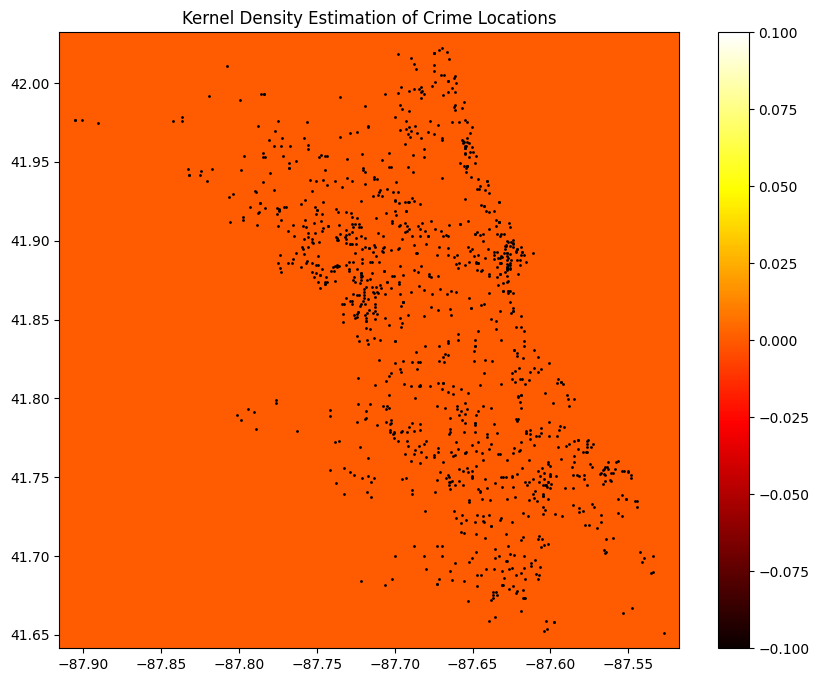

In [ ]:
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for Latitude and Longitude
pandas_df = dataset.select("Latitude", "Longitude").dropna().toPandas()

# Extract coordinates and compute KDE
lat_long = pandas_df[['Latitude', 'Longitude']].values.T
kde = gaussian_kde(lat_long, bw_method='silverman')  # Using Silverman's rule of thumb for bandwidth

# Define grid over which to evaluate the KDE
xmin, xmax = lat_long[1].min() - 0.01, lat_long[1].max() + 0.01
ymin, ymax = lat_long[0].min() - 0.01, lat_long[0].max() + 0.01
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
f = np.reshape(kde(positions).T, xx.shape)

# Plot the KDE result with better contrast
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(np.rot90(f), cmap='hot', extent=[xmin, xmax, ymin, ymax], aspect='auto')
ax.plot(lat_long[1], lat_long[0], 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title('Kernel Density Estimation of Crime Locations')
plt.colorbar(ax.imshow(np.rot90(f), cmap='hot', extent=[xmin, xmax, ymin, ymax], aspect='auto'))  # Add a color bar for reference
plt.show()


Case4: K-means clustring

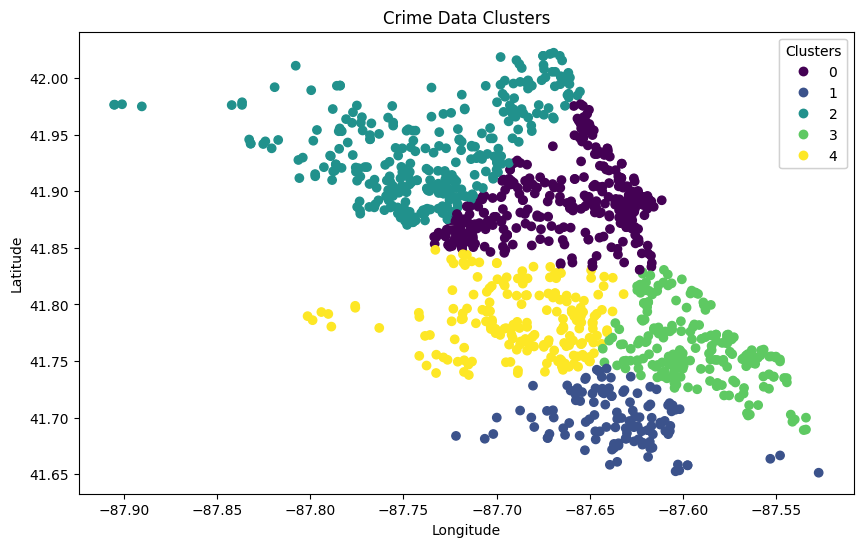

In [ ]:
vecAssembler = VectorAssembler(inputCols=["Latitude", "Longitude"], outputCol="features")
df_kmeans = vecAssembler.transform(dataset)
k = 5
kmeans = KMeans(featuresCol="features", k=k, seed=1)
model = kmeans.fit(df_kmeans)
transformed = model.transform(df_kmeans)
pandas_df = transformed.select("Latitude", "Longitude", "prediction").toPandas()

fig, ax = plt.subplots(figsize=(10, 6))
colors = pandas_df['prediction'].astype(int)
scatter = ax.scatter(pandas_df['Longitude'], pandas_df['Latitude'], c=colors, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.title('Crime Data Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## 4. Demographic Context

In [ ]:
'''block_indexer = StringIndexer(inputCol="Block", outputCol="indexedBlock").fit(dataset)
label_indexer = StringIndexer(inputCol="Primary Type", outputCol="indexedLabel").fit(dataset)
vector_assembler = VectorAssembler(inputCols = ["Block"], outputCol="features")
vector_assembler = VectorAssembler(inputCols=["indexedBlock"], outputCol="features")
df_temp = block_indexer.transform(dataset)
df_temp = vector_assembler.transform(df_temp)
(trainingData, testData) = df_temp.randomSplit([0.7, 0.3])
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=100)
pipeline = Pipeline(stages=[block_indexer, label_indexer, vector_assembler, rf])
model = pipeline.fit(trainingData)


predictions = model.transform(testData)

evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions) * 100
print("Accuracy = %g" % accuracy)'''


'block_indexer = StringIndexer(inputCol="Block", outputCol="indexedBlock").fit(dataset)\nlabel_indexer = StringIndexer(inputCol="Primary Type", outputCol="indexedLabel").fit(dataset)\nvector_assembler = VectorAssembler(inputCols = ["Block"], outputCol="features")\nvector_assembler = VectorAssembler(inputCols=["indexedBlock"], outputCol="features")\ndf_temp = block_indexer.transform(dataset)\ndf_temp = vector_assembler.transform(df_temp)\n(trainingData, testData) = df_temp.randomSplit([0.7, 0.3])\nrf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features", numTrees=100)\npipeline = Pipeline(stages=[block_indexer, label_indexer, vector_assembler, rf])\nmodel = pipeline.fit(trainingData)\n\n\npredictions = model.transform(testData)\n\nevaluator = MulticlassClassificationEvaluator(\n    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")\n\naccuracy = evaluator.evaluate(predictions) * 100\nprint("Accuracy = %g" % accuracy)'

## 5. Social Media Data (X posts)

Training a logistic regression model on  the posts data and evaluating its accuracy.


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=0).fit(features_train, y_train)

print("[{}] Accuracy: train = {}, test = {}".format(
        logreg.__class__.__name__,
        logreg.score(features_train, y_train),
        logreg.score(features_test, y_test)))


[LogisticRegression] Accuracy: train = 0.9714485899456998, test = 0.7962184873949579


# Ensemble model

I am currently working on implementing an ensemble model to predict crime types. This model combines predictions from multiple individual models, such as Random Forest and Multilayer Perceptron classifiers, using majority voting to improve overall prediction accuracy.